# Programming Assignment #3

The file contains all of the integers between 1 and 10,000 (inclusive, with no repeats) in unsorted order. The integer in the ith row of the file gives you the ith entry of an input array.

Your task is to compute the total number of comparisons used to sort the given input file by QuickSort. As you know, the number of comparisons depends on which elements are chosen as pivots, so we'll ask you to explore three different pivoting rules.

You should not count comparisons one-by-one. Rather, when there is a recursive call on a subarray of length mm, you should simply add m-1m−1 to your running total of comparisons. (This is because the pivot element is compared to each of the other m-1m−1 elements in the subarray in this recursive call.)

WARNING: The Partition subroutine can be implemented in several different ways, and different implementations can give you differing numbers of comparisons. For this problem, you should implement the Partition subroutine exactly as it is described in the video lectures (otherwise you might get the wrong answer).

DIRECTIONS FOR THIS PROBLEM:

For the first part of the programming assignment, you should always use the first element of the array as the pivot element.

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

plt.style.use("ggplot")

%matplotlib inline

## Quick Sort

In [138]:
def quick_sort(array):
    length = len(array)
    
    if length <= 1:
        return array
    
    if length == 2:
        if array[0] > array[1]:
            return [array[1], array[0]]
        else:
            return array
        
    else:
        pivot = np.random.randint(0, length)
        small = []
        large = []
        
        for element in array:
            if element < array[pivot]:
                small.append(element)
            elif element > array[pivot]:
                large.append(element)
                
        if not small:
            return [array[pivot]] + quick_sort(large)
        elif not large:
            return quick_sort(small) + [array[pivot]]
        else:
            return quick_sort(small) + [array[pivot]] + quick_sort(large)

## Quick Sort in-Place

In [146]:
def quick_sort_in_place(array, start, end):
    if start < end:
        
        if start + 1 == end:
            if array[start] > array[end]:
                larger = array[start]
                array[start] = array[end]
                array[end] = larger
        
        pivot = np.random.randint(start, end+1)
        pivot_value = array[pivot]
        
        array[pivot] = array[-1]
        array[-1] = pivot_value
        
        border = start - 1
        
        for i in range(start, end):
            if array[i] < pivot_value:
                border += 1
                border_value = array[i]
                array[i] = array[border]
                array[border] = border_value
        array[-1] = array[border+1]
        array[border+1] = pivot_value
        
        array = quick_sort_in_place(array, start, border+1)
        array = quick_sort_in_place(array, border+2, end)

    return array

## Merge Sort

In [141]:
def merge_sort(array):
    
    length = len(array)
    
    if length == 2:
        if array[0] > array[1]:
            return np.array([array[1], array[0]])
        else:
            return array
    
    elif length > 2:
        array_l = array[:int(length/2)]
        array_r = array[int(length/2):]
        array_l_sorted = merge_sort(array_l)
        array_r_sorted = merge_sort(array_r)

        l = 0
        r = 0
        
        sorted_list = []
        
        for i in range(length):
            if r == int(length/2):
                sorted_list.append(array_l_sorted[l])
                l += 1

            elif l == int(length/2):
                sorted_list.append(array_r_sorted[r])
                r += 1               
                
            elif array_l_sorted[l] > array_r_sorted[r]:
                sorted_list.append(array_r_sorted[r])
                r += 1
                
            elif array_l_sorted[l] < array_r_sorted[r]:
                sorted_list.append(array_l_sorted[l])
                l += 1
        
        return np.array(sorted_list)

## Insertion Sort

In [143]:
def insertion_sort(array):
    for j in range(1, len(array)):
        key = array[j]
        i = j - 1
        while i >= 0 and array[i] > key:
            array[i+1] = array[i]
            i -= 1
        array[i+1] = key
    return array

In [149]:
X = np.random.rand(100)

In [152]:
quick_sort_in_place(X, 0, 100)

array([0.00235486, 0.00379954, 0.02355799, 0.07050348, 0.08257837,
       0.08418582, 0.1064806 , 0.11975511, 0.11030949, 0.13100573,
       0.1319048 , 0.13606995, 0.1392466 , 0.16231289, 0.16244581,
       0.17835396, 0.20581581, 0.22955565, 0.4382415 , 0.24212718,
       0.24243779, 0.25250331, 0.26232791, 0.26556049, 0.25778148,
       0.28936684, 0.30525974, 0.3189977 , 0.32113767, 0.32919284,
       0.33547535, 0.33821563, 0.33858212, 0.34134117, 0.3533757 ,
       0.35359173, 0.36095395, 0.38232435, 0.40187504, 0.40312542,
       0.41133861, 0.42716143, 0.45721676, 0.45891876, 0.45900562,
       0.46223465, 0.38730327, 0.47232731, 0.4746235 , 0.49906598,
       0.499639  , 0.51526907, 0.52620796, 0.53356182, 0.55197126,
       0.575391  , 0.57865318, 0.58046953, 0.58507198, 0.50104821,
       0.58964565, 0.61016881, 0.62131023, 0.63919337, 0.64607153,
       0.67127421, 0.68416885, 0.6872837 , 0.69513642, 0.73497207,
       0.75106854, 0.68828444, 0.77407781, 0.7754505 , 0.77794

## Performance Check

In [147]:
time_list = []
for i in range(2, 15):
    Z = np.random.rand(2**i)
    
    start_time = time.time()
    insertion_sort(Z)
    insertion = time.time() - start_time
    
    start_time = time.time()
    merge_sort(Z)
    merge = time.time() - start_time
    
    start_time = time.time()
    quick_sort(Z)
    quick = time.time() - start_time    
    
    start_time = time.time()
    quick_sort_in_place(Z, 0, len(Z)-1)
    quick_ip = time.time() - start_time    
    
    time_list.append([insertion, merge, quick, quick_ip])
    print("i={}: completed".format(i))

i=2: completed
i=3: completed
i=4: completed
i=5: completed
i=6: completed
i=7: completed
i=8: completed
i=9: completed
i=10: completed
i=11: completed
i=12: completed
i=13: completed
i=14: completed


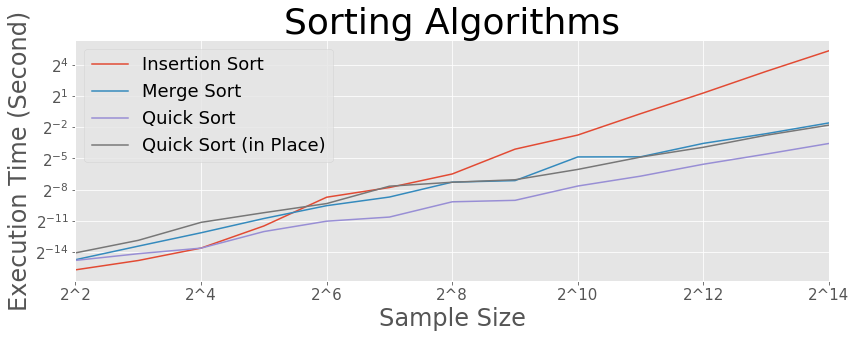

In [148]:
time_df = pd.DataFrame(time_list, index=range(2, 15), columns=["insertion", "merge", "quick", "quick_in_place"])
time_df.plot(figsize=(12, 4.8))

plt.title("Sorting Algorithms", fontsize=36)
plt.legend(["Insertion Sort", "Merge Sort", "Quick Sort", "Quick Sort (in Place)"], fontsize=18)
plt.xlabel("Sample Size", fontsize = 24)
plt.xticks(np.arange(2, 15, 2), labels = ["2^{}".format(i) for i in range(2, 15, 2)], fontsize=15)
plt.yticks(fontsize=15)
plt.yscale("log", basey=2)
plt.ylabel("Execution Time (Second)", fontsize = 24)
plt.tight_layout()
plt.savefig("image/insertion_quick_merge_sort.png")
plt.show()

In [153]:
time_list_large = []
for i in range(2, 25):
    Z = np.random.rand(2**i)
    
    start_time = time.time()
    insertion_sort(Z)
    insertion = time.time() - start_time
    
    start_time = time.time()
    merge_sort(Z)
    merge = time.time() - start_time
    
    start_time = time.time()
    quick_sort(Z)
    quick = time.time() - start_time    
    
    start_time = time.time()
    quick_sort_in_place(Z, 0, len(Z)-1)
    quick_ip = time.time() - start_time    
    
    time_list_large.append([insertion, merge, quick, quick_ip])
    print("i={}: completed".format(i))

i=2: completed
i=3: completed
i=4: completed
i=5: completed
i=6: completed
i=7: completed
i=8: completed
i=9: completed
i=10: completed
i=11: completed
i=12: completed
i=13: completed
i=14: completed
i=15: completed
i=16: completed
i=17: completed
i=18: completed


KeyboardInterrupt: 

In [163]:
pd.DataFrame(time_list_large, index=range(2, 19), columns=["insertion", "merge", "quick", "quick_in_place"])


,insertion,merge,quick,quick_in_place
2,0.000017,0.000029,0.000031,0.000073
3,0.000029,0.000046,0.000027,0.000068
4,0.000067,0.000115,0.000053,0.000183
5,0.000144,0.000244,0.000096,0.000415
6,0.001223,0.001024,0.000236,0.000687
7,0.002183,0.001322,0.000454,0.002392
8,0.013440,0.003230,0.000894,0.004179
9,0.041005,0.006087,0.001839,0.009001
10,0.147760,0.017142,0.004052,0.018889
11,0.624064,0.029267,0.008295,0.029658


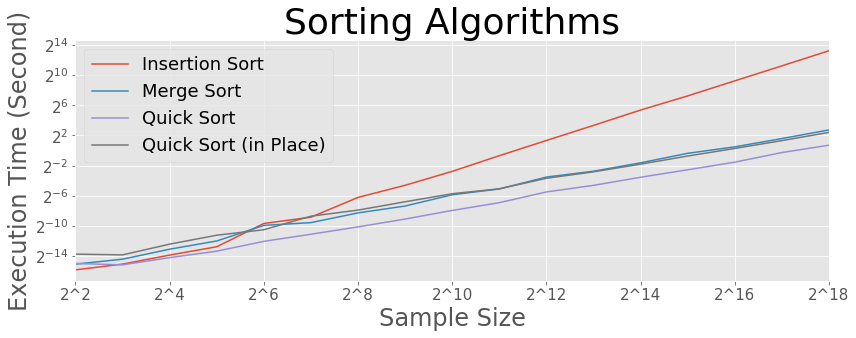

In [164]:
time_df_l = pd.DataFrame(time_list_large, index=range(2, 19), columns=["insertion", "merge", "quick", "quick_in_place"])
time_df_l.plot(figsize=(12, 4.8))

plt.title("Sorting Algorithms", fontsize=36)
plt.legend(["Insertion Sort", "Merge Sort", "Quick Sort", "Quick Sort (in Place)"], fontsize=18)
plt.xlabel("Sample Size", fontsize = 24)
plt.xticks(np.arange(2, 19, 2), labels = ["2^{}".format(i) for i in range(2, 19, 2)], fontsize=15)
plt.yticks(fontsize=15)
plt.yscale("log", basey=2)
plt.ylabel("Execution Time (Second)", fontsize = 24)
plt.tight_layout()
# plt.savefig("image/insertion_quick_merge_sort_l.png")
plt.show()

In [121]:
time_list = []
for i in range(10000):
    Z = np.random.rand(2**10)
    
    start_time = time.time()
    merge_sort(Z)
    merge = time.time() - start_time
    
    start_time = time.time()
    quick_sort(Z)
    quick = time.time() - start_time  
    
    time_list.append([merge, quick])
    
    if (i+1) % 1000 == 0:
        print("{}% completed".format((i+1)/100))

10.0% completed
20.0% completed
30.0% completed
40.0% completed
50.0% completed
60.0% completed
70.0% completed
80.0% completed
90.0% completed
100.0% completed


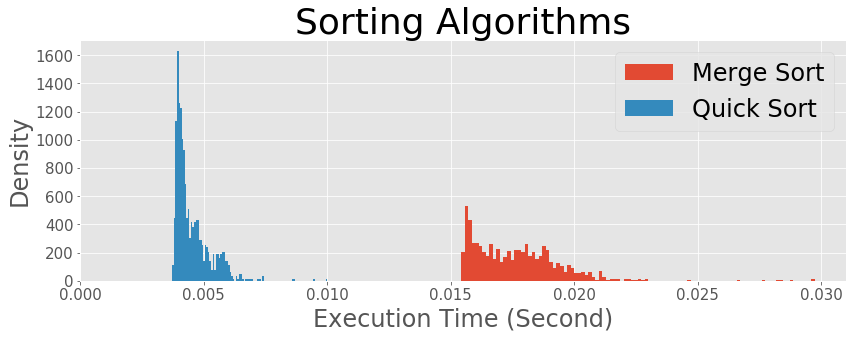

In [135]:
trial_df = pd.DataFrame(time_list[:1000], columns=["merge", "quick"])
plt.figure(figsize=(12, 4.8))
plt.hist(trial_df["merge"], bins=100, density=True)
plt.hist(trial_df["quick"], bins=100, density=True)
plt.legend(["Merge Sort", "Quick Sort"], fontsize=24)

plt.title("Sorting Algorithms", fontsize=36)
plt.xlabel("Execution Time (Second)", fontsize = 24)
plt.xlim(0, 0.031)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Density", fontsize = 24)

plt.tight_layout()
plt.savefig("image/quick_merge_sort_distribution_1000.png")
plt.show()

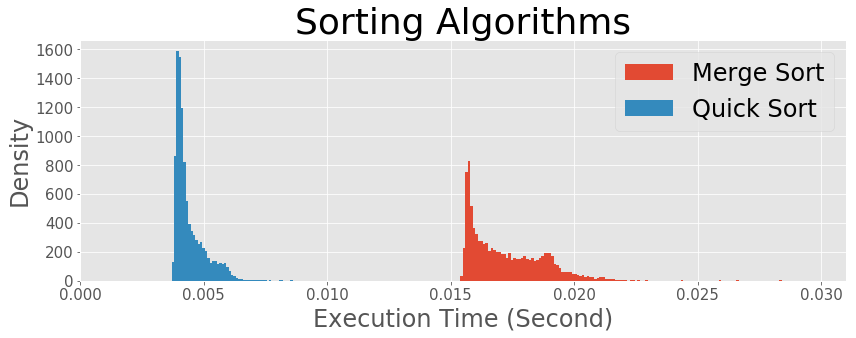

In [136]:
trial_df = pd.DataFrame(time_list, columns=["merge", "quick"])
plt.figure(figsize=(12, 4.8))
plt.hist(trial_df["merge"], bins=1000, density=True)
plt.hist(trial_df["quick"], bins=1000, density=True)
plt.legend(["Merge Sort", "Quick Sort"], fontsize=24)

plt.title("Sorting Algorithms", fontsize=36)
plt.xlabel("Execution Time (Second)", fontsize = 24)
plt.xlim(0, 0.031)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Density", fontsize = 24)

plt.tight_layout()
plt.savefig("image/quick_merge_sort_distribution.png")
plt.show()

In [76]:
trial_df.describe()

,merge,quick
count,1000.000000,1000.000000
mean,0.019646,0.004610
std,0.004028,0.001143
min,0.016365,0.003724
25%,0.017315,0.003959
50%,0.018123,0.004157
75%,0.020002,0.004827
max,0.047073,0.017625
